In [1]:
!pip -qq install git+https://github.com/huggingface/transformers.git
!pip install py3nvml

!mkdir -p plots_pt
!wget https://raw.githubusercontent.com/COMP6248-Reproducability-Challenge/Reproducability-REFORMER/main/utils/plot_csv_file.py

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 901kB 5.9MB/s 
     |████████████████████████████████| 3.3MB 36.6MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
--2021-05-09 18:50:20--  https://raw.githubusercontent.com/COMP6248-Reproducability-Challenge/Reproducability-REFORMER/main/utils/plot_csv_file.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8099 (7.9K) [text/plain]
Saving to: ‘plot_csv_file.py’

plot_csv_file.py    100%[===================>]   7.91K  --.-KB/s    in 0s      

2021-05-09 18:50:20 (90.9 MB/s) - ‘plot_csv_file.py’ saved [8099/8099]



In [2]:
! /opt/bin/nvidia-smi

Sun May  9 18:50:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from transformers import ReformerConfig, PyTorchBenchmarkArguments, PyTorchBenchmark
import torch
import pandas as pd
import glob

In [4]:
torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0)
benchmark_args = PyTorchBenchmarkArguments(models=["full-attention"], sequence_lengths=[1024], batch_sizes=[32], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_full_attention_32.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0)
benchmark_args = PyTorchBenchmarkArguments(models=["full-attention"], sequence_lengths=[2048], batch_sizes=[16], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_full_attention_16.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0)
benchmark_args = PyTorchBenchmarkArguments(models=["full-attention"], sequence_lengths=[4096], batch_sizes=[8], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_full_attention_8.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0)
benchmark_args = PyTorchBenchmarkArguments(models=["full-attention"], sequence_lengths=[8192], batch_sizes=[4], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_full_attention_4.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0)
benchmark_args = PyTorchBenchmarkArguments(models=["full-attention"], sequence_lengths=[16386], batch_sizes=[2], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_full_attention_2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0)
benchmark_args = PyTorchBenchmarkArguments(models=["full-attention"], sequence_lengths=[32768], batch_sizes=[1], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_full_attention_1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()


1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
        full-attention               32             1024           1.101     
--------------------------------------------------------------------------------
Saving results to csv.
1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
        full-attention               16             2048           1.433     
--------------------------------------------------------------------------------
Saving

In [5]:
torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=1)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-1"], sequence_lengths=[1024], batch_sizes=[32], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_1_32.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=1)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-1"], sequence_lengths=[2048], batch_sizes=[16], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_1_16.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=1)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-1"], sequence_lengths=[4096], batch_sizes=[8], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_1_8.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=1)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-1"], sequence_lengths=[8192], batch_sizes=[4], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_1_4.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=1)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-1"], sequence_lengths=[16386], batch_sizes=[2], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_1_2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=1)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-1"], sequence_lengths=[32768], batch_sizes=[1], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_1_1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
          lsh-hash-1                 32             1024           0.911     
--------------------------------------------------------------------------------
Saving results to csv.
1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
          lsh-hash-1                 16             2048           0.918     
--------------------------------------------------------------------------------
Saving 

In [7]:
torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=2)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-2"], sequence_lengths=[1024], batch_sizes=[32], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_2_32.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=2)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-2"], sequence_lengths=[2048], batch_sizes=[16], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_2_16.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=2)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-2"], sequence_lengths=[4096], batch_sizes=[8], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_2_8.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=2)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-2"], sequence_lengths=[8192], batch_sizes=[4], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_2_4.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=2)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-2"], sequence_lengths=[16386], batch_sizes=[2], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_2_2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=2)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-2"], sequence_lengths=[32768], batch_sizes=[1], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_2_1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
          lsh-hash-2                 32             1024           0.997     
--------------------------------------------------------------------------------
Saving results to csv.
1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
          lsh-hash-2                 16             2048           0.998     
--------------------------------------------------------------------------------
Saving 

In [8]:
torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=4)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-4"], sequence_lengths=[1024], batch_sizes=[32], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_4_32.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=4)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-4"], sequence_lengths=[2048], batch_sizes=[16], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_4_16.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=4)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-4"], sequence_lengths=[4096], batch_sizes=[8], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_4_8.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=4)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-4"], sequence_lengths=[8192], batch_sizes=[4], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_4_4.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=4)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-4"], sequence_lengths=[16386], batch_sizes=[2], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_4_2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=4)
benchmark_args = PyTorchBenchmarkArguments(models=["lsh-hash-4"], sequence_lengths=[32768], batch_sizes=[1], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_hash_4_1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
          lsh-hash-4                 32             1024           1.153     
--------------------------------------------------------------------------------
Saving results to csv.
1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
          lsh-hash-4                 16             2048           1.155     
--------------------------------------------------------------------------------
Saving 

In [9]:
required_time_frame = pd.concat([pd.read_csv(f) for f in glob.glob("plots_pt/required_time_*.csv")], ignore_index=True)
required_time_frame['batch_size'] = 1
required_time_frame.to_csv('plots_pt/required_time.csv', index = False)

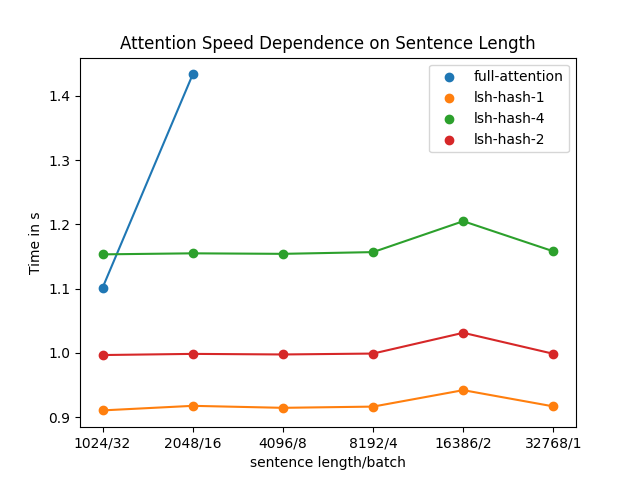

In [10]:
!python plot_csv_file.py --csv_file plots_pt/required_time.csv --figure_png_file=plots_pt/required_time_plot.png --no_log_scale --title='Attention Speed Dependence on Sentence Length' --is_time --is_x_dic --is_label_btz=False --is_x_dic_names=True --x_label="sentence length/batch"

# show image
from IPython.display import Image
Image('plots_pt/required_time_plot.png')

In [11]:
torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0)
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-full-attention"], sequence_lengths=[1024, 2048, 4096, 8192, 16386, 32768], batch_sizes=[1], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_full_attention.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=1)
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-hash-1"], sequence_lengths=[1024, 2048, 4096, 8192, 16386, 32768], batch_sizes=[1], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_hash_1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=2)
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-hash-2"], sequence_lengths=[1024, 2048, 4096, 8192, 16386, 32768], batch_sizes=[1], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_hash_2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=4)
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-hash-4"], sequence_lengths=[1024, 2048, 4096, 8192, 16386, 32768], batch_sizes=[1], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_hash_4.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", num_hashes=8)
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-hash-8"], sequence_lengths=[1024, 2048, 4096, 8192, 16386, 32768], batch_sizes=[1], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_hash_8.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

1 / 1
Doesn't fit on GPU. CUDA out of memory. Tried to allocate 8.00 GiB (GPU 0; 15.78 GiB total capacity; 10.87 GiB already allocated; 3.17 GiB free; 11.32 GiB reserved in total by PyTorch)
Doesn't fit on GPU. CUDA out of memory. Tried to allocate 32.00 GiB (GPU 0; 15.78 GiB total capacity; 1.68 GiB already allocated; 11.17 GiB free; 3.31 GiB reserved in total by PyTorch)

====================      INFERENCE - MEMORY - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length    Memory in MB 
--------------------------------------------------------------------------------
   reformer-full-attention           1              1024            2101     
   reformer-full-attention           1              2048            2485     
   reformer-full-attention           1              4096            4021     
   reformer-full-attention           1              8192           101

In [12]:
required_memory_frame = pd.concat([pd.read_csv(f) for f in glob.glob("plots_pt/required_memory_*.csv")], ignore_index=True)
required_memory_frame['batch_size'] = 1
required_memory_frame.to_csv('plots_pt/required_memory.csv', index = False)

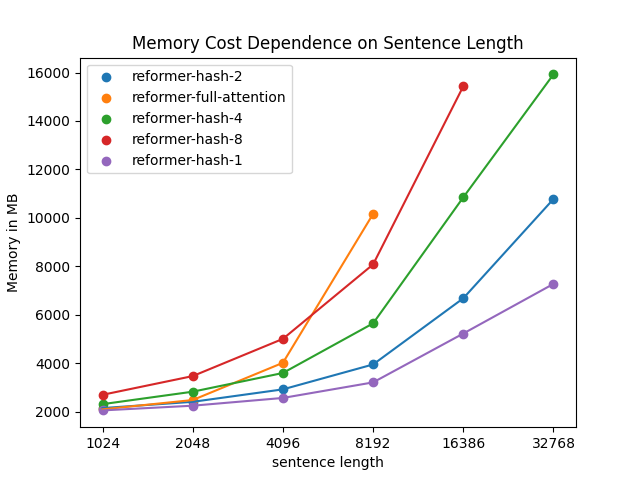

In [13]:
!python plot_csv_file.py --csv_file plots_pt/required_memory.csv --figure_png_file=plots_pt/required_memory_plot.png --no_log_scale --title='Memory Cost Dependence on Sentence Length' --is_x_dic --is_label_btz=False --x_label="sentence length"

# show image
from IPython.display import Image
Image('plots_pt/required_memory_plot.png')

(480, 640, 4)


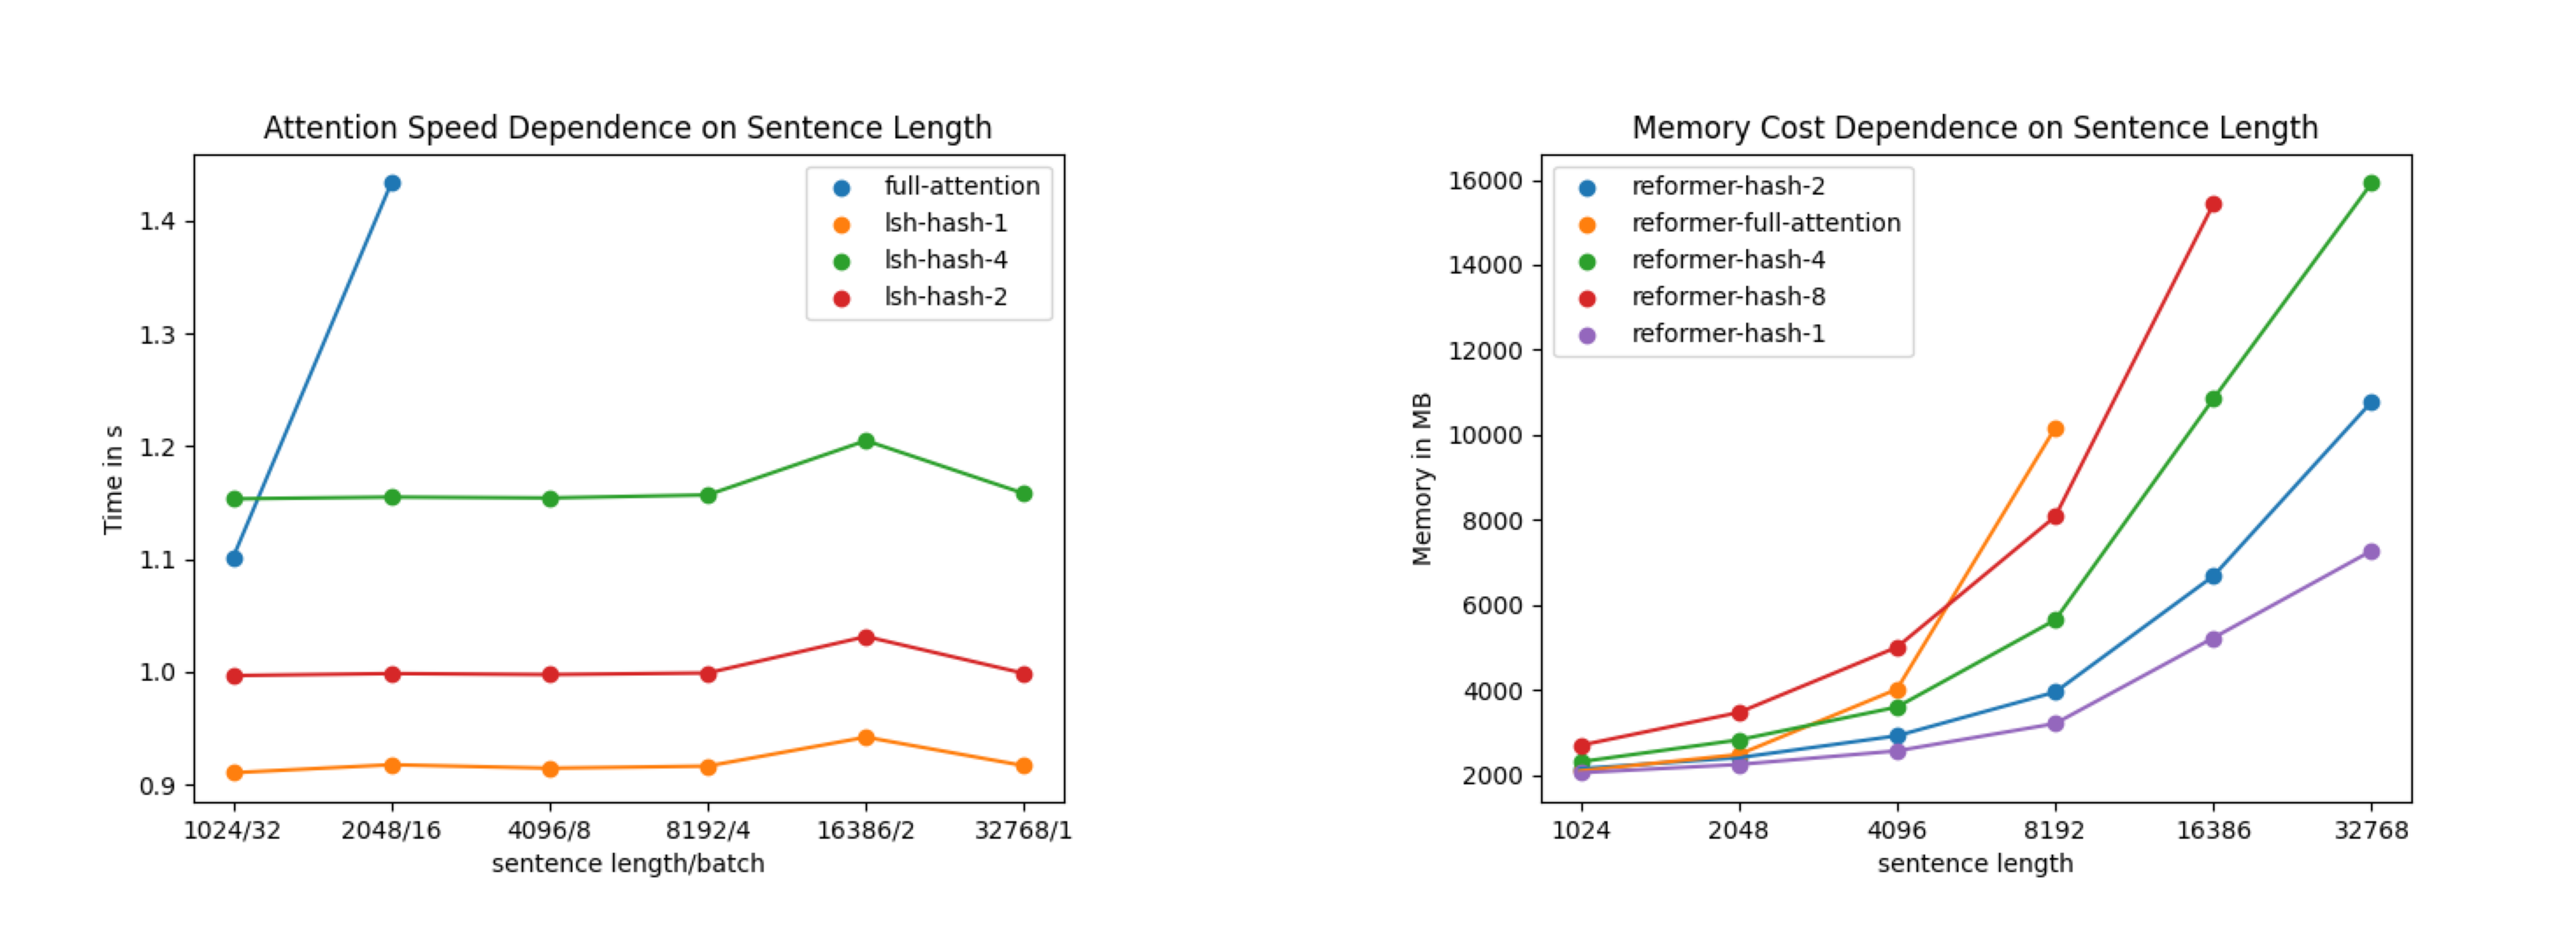

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

required_memory_plot = mpimg.imread('plots_pt/required_memory_plot.png')
required_time_plot = mpimg.imread('plots_pt/required_time_plot.png')
print(required_memory_plot.shape)

fig, ax = plt.subplots(1, 2, figsize=(6, 3), dpi=800)
ax[0].imshow(required_time_plot)
ax[0].axis('off')
ax[1].imshow(required_memory_plot)
ax[1].axis('off')
plt.show()